In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

##  <font color = 'red'> **Dataset 1: FUEL CONSUMPTION** </font>

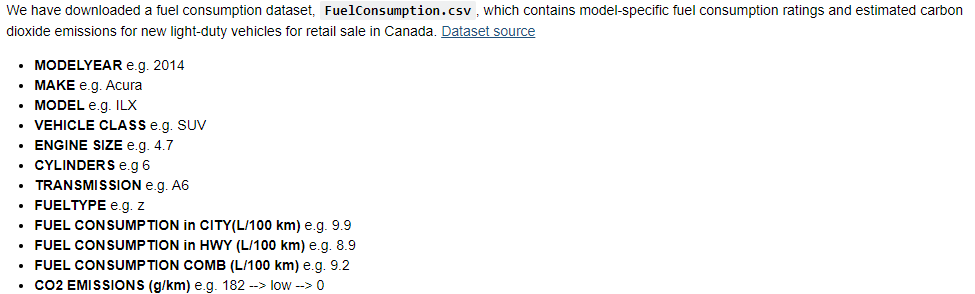

In [2]:
df=pd.read_csv('FuelConsumptionDataset.csv')

## **STEP 0: DATA EXPLORATION**

In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


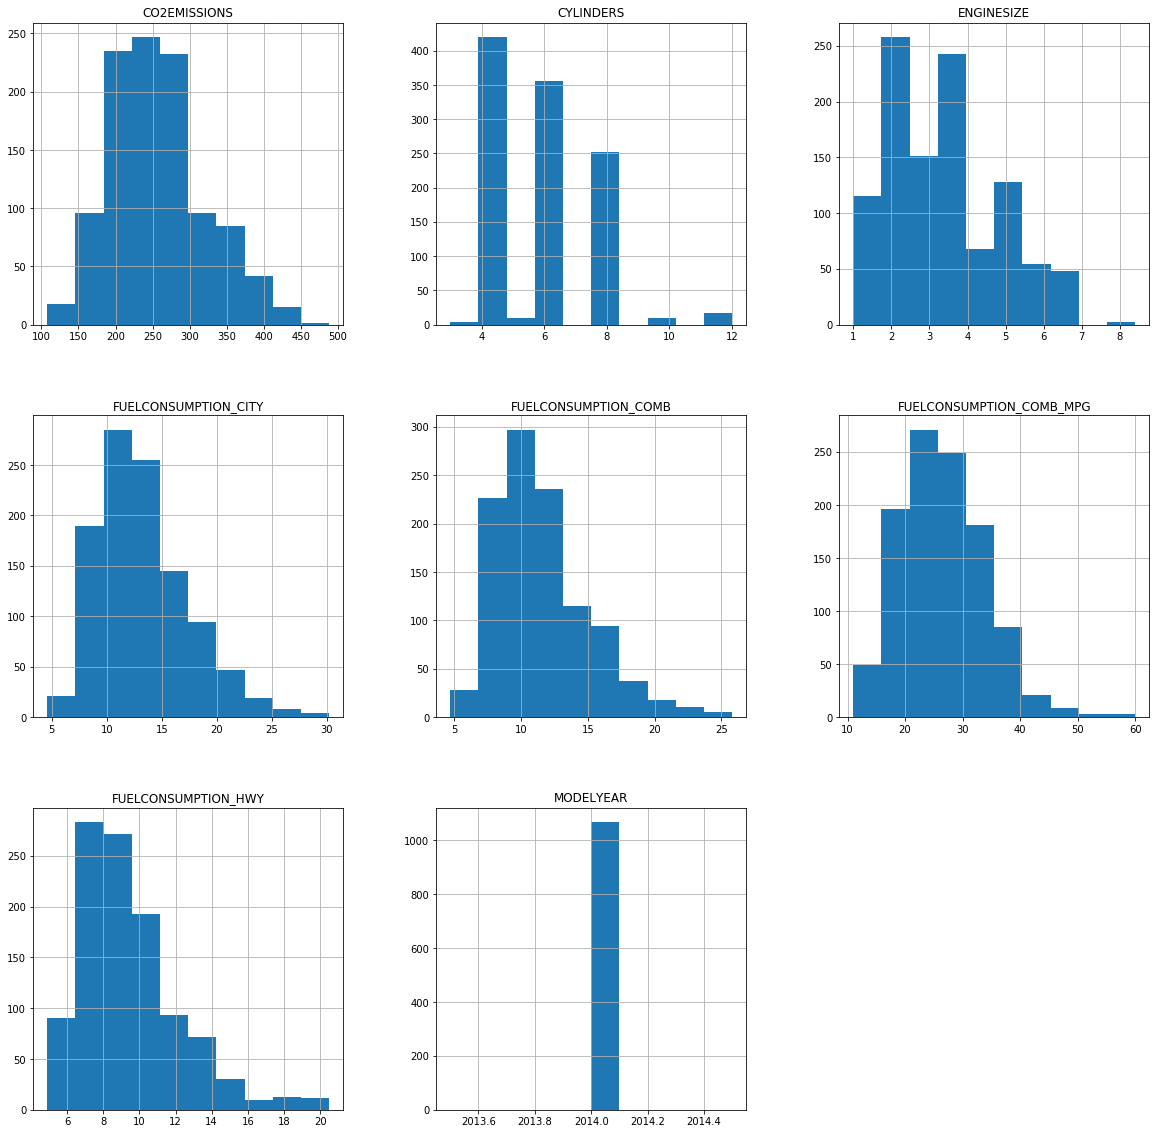

In [4]:
df.hist(figsize=(20,20))
plt.show()

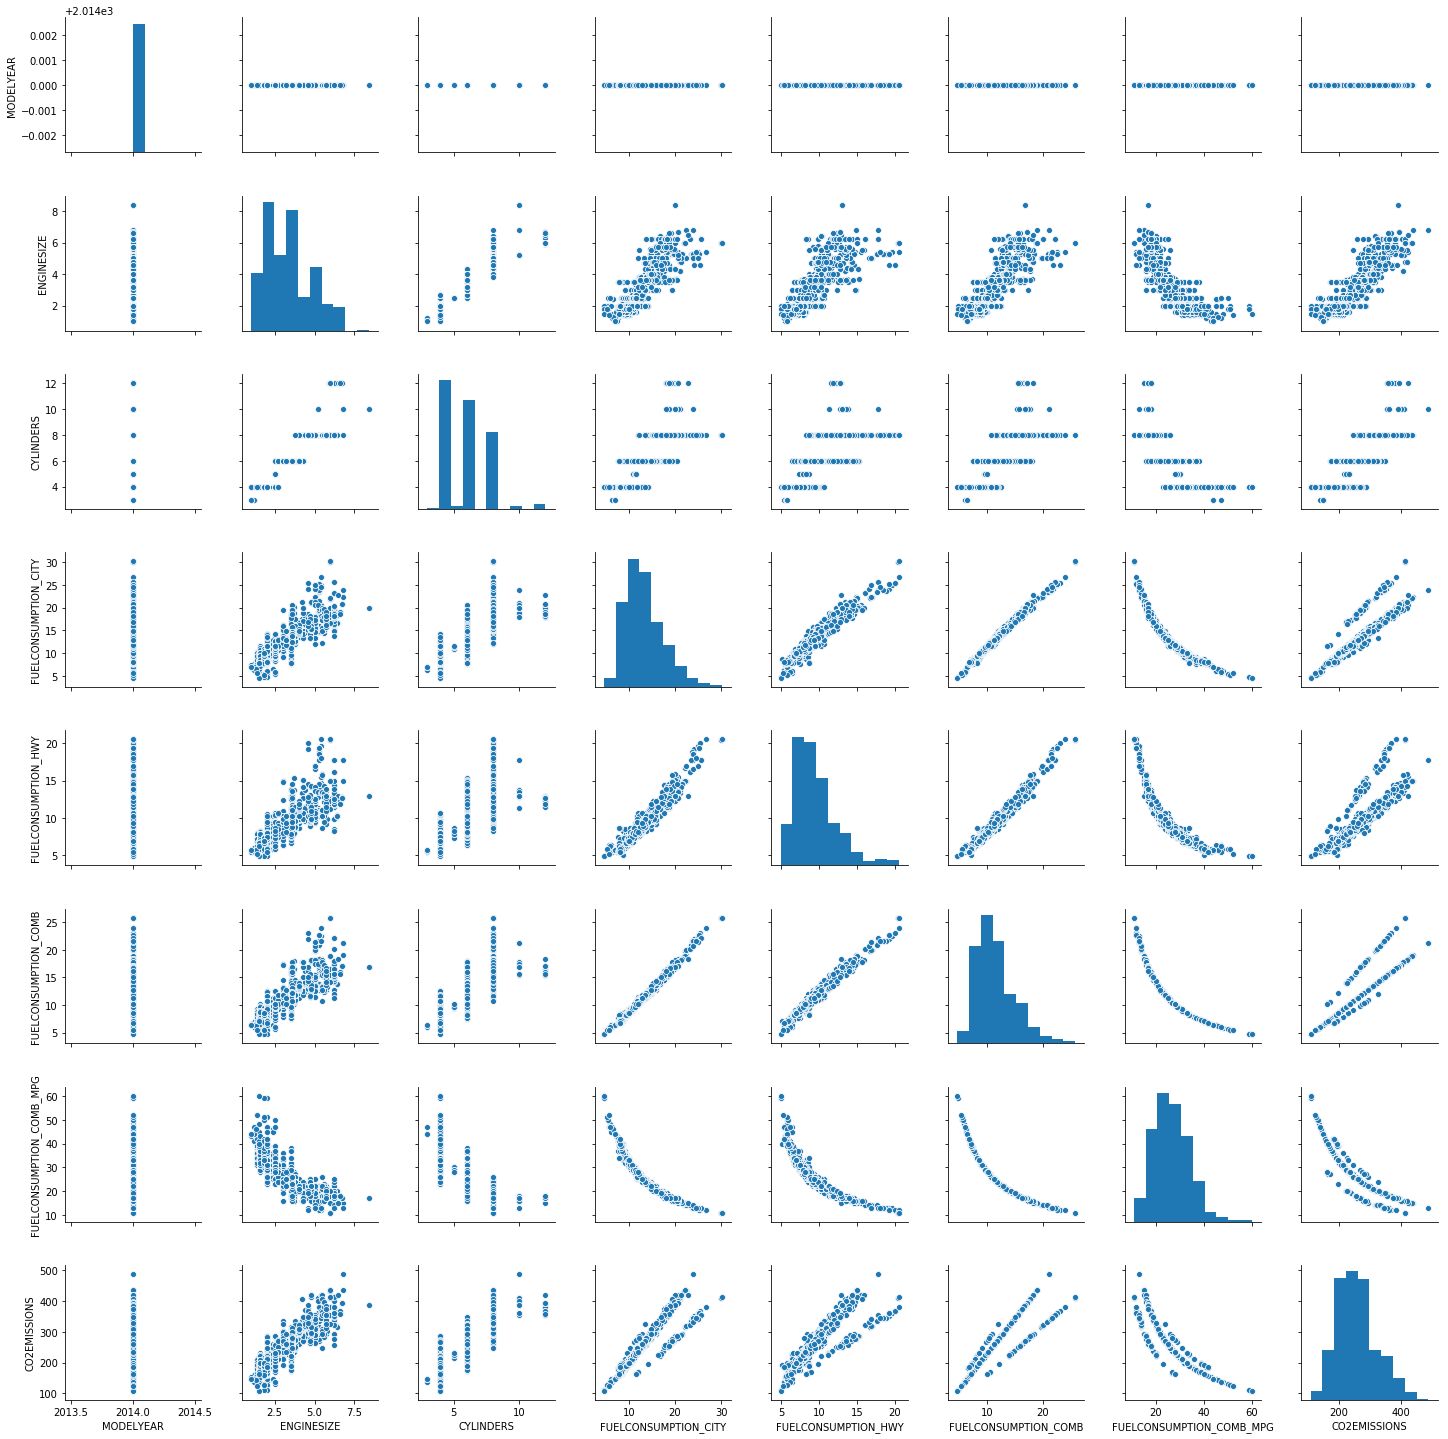

In [5]:
sns.pairplot(df)
plt.show()

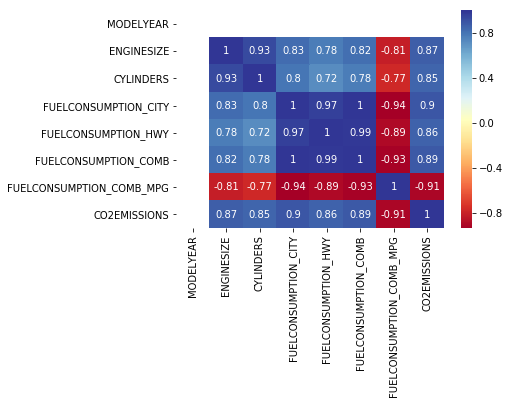

In [6]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlBu')
plt.show()

## **STEP 1: PRE-PROCESSING**
REMOVING NULL-VALUES AND OUTLIERS

In [7]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

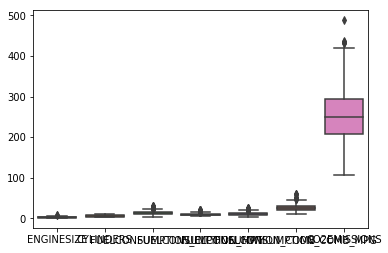

In [8]:
sns.boxplot(data=df.iloc[:,1:])
plt.show()

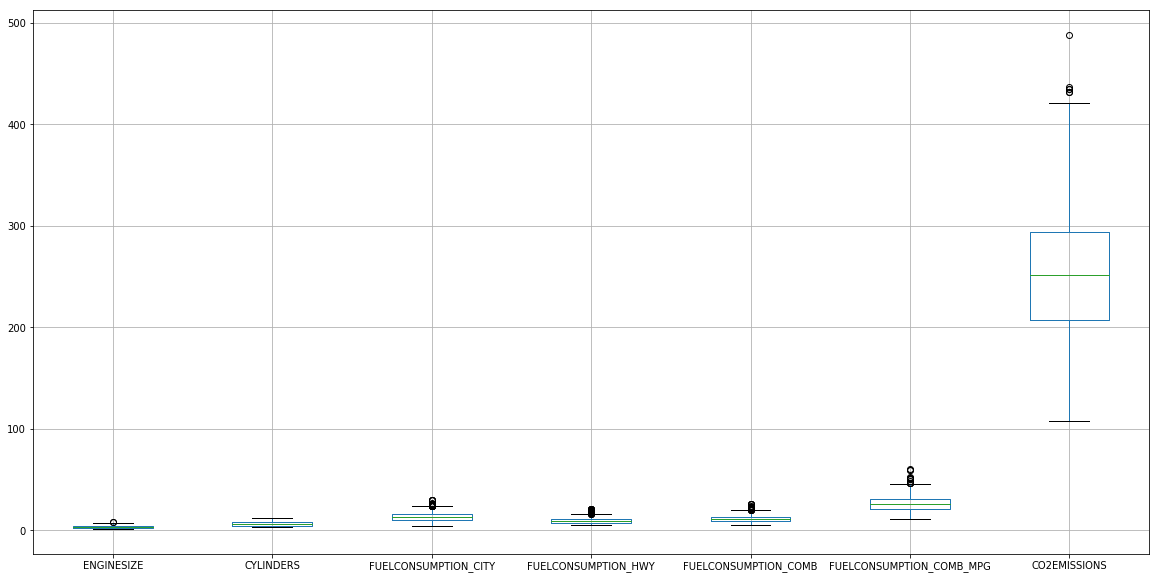

In [9]:
df.iloc[:,1:].boxplot(figsize=(20,10))
plt.show()

## **STEP 2: TRAIN-TEST SPLIT and Feature Scaling (Part of Pre-processing)**

In [10]:
Y = df['CO2EMISSIONS']
num=['ENGINESIZE','FUELCONSUMPTION_COMB']
X = df[num]

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sc=StandardScaler()


**Train-Test Split**

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.80,random_state=101)
X_train[num]=sc.fit_transform(X_train[num])
X_test[num]=sc.transform(X_test[num])

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr=LinearRegression()
lr

LinearRegression()

In [15]:
r=lr.fit(X_train,Y_train)
y_test_pred=r.predict(X_test)

In [16]:
# r=lr.fit(X_train,Y_train)
print(r.coef_)
print(r.intercept_)

[26.80191136 34.41761967]
254.7596717467761


In [17]:
y_train_pred=r.predict(X_train)

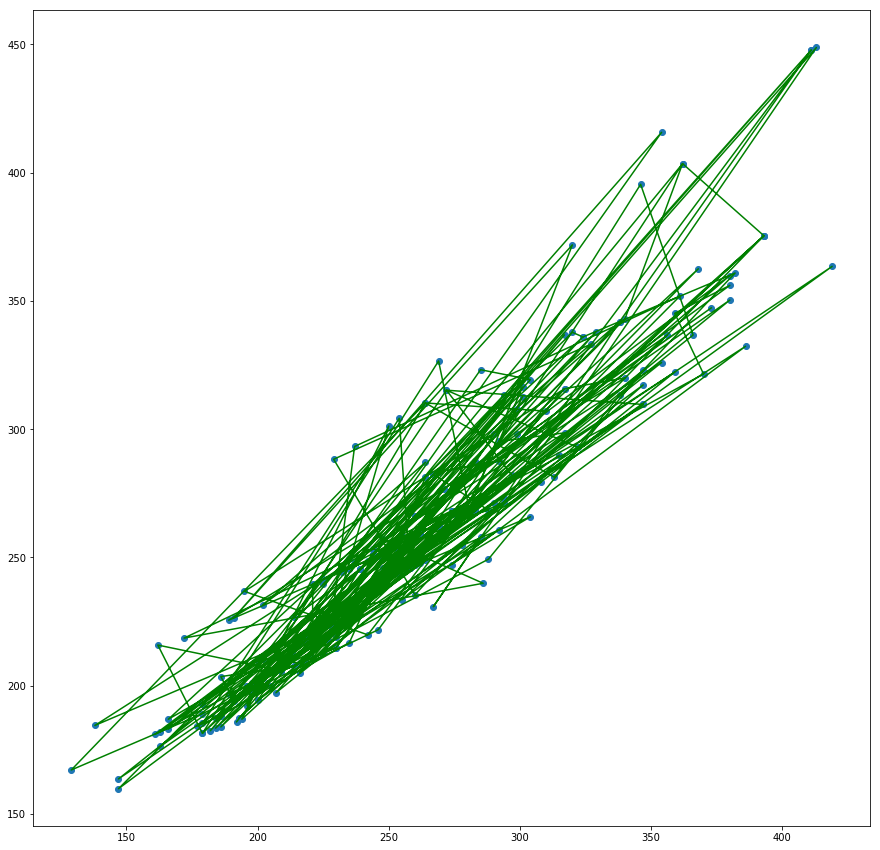

In [18]:
plt.scatter(Y_test,y_test_pred)
plt.plot(Y_test,y_test_pred,'g')
plt.gcf().set_size_inches(15, 15)

plt.show()


In [19]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, y_test_pred))
print('MSE:', metrics.mean_squared_error(Y_test, y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)))

MAE: 16.707031947085333
MSE: 500.46905519471994
RMSE: 22.37116570933933


In [20]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_train, y_train_pred))
print('MSE:', metrics.mean_squared_error(Y_train, y_train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_train, y_train_pred)))

MAE: 17.142927435451238
MSE: 586.3720664386522
RMSE: 24.21512061581879


In [21]:
y=df.pop('CO2EMISSIONS')
X=df.select_dtypes(include='number')

In [22]:
num=['MODELYEAR', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG']

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,train_size=0.80,random_state=101)
X_train[num]=sc.fit_transform(X_train[num])
X_test[num]=sc.transform(X_test[num])

In [24]:
r=lr.fit(X_train,Y_train)
print(r.coef_)
print(r.intercept_)
y_test_pred=r.predict(X_test)

[  0.          11.5838097   14.34659787 -47.32604182 -12.42537714
  67.4807172  -29.60344441]
254.7596717467761


In [25]:
y_train_pred=r.predict(X_train)

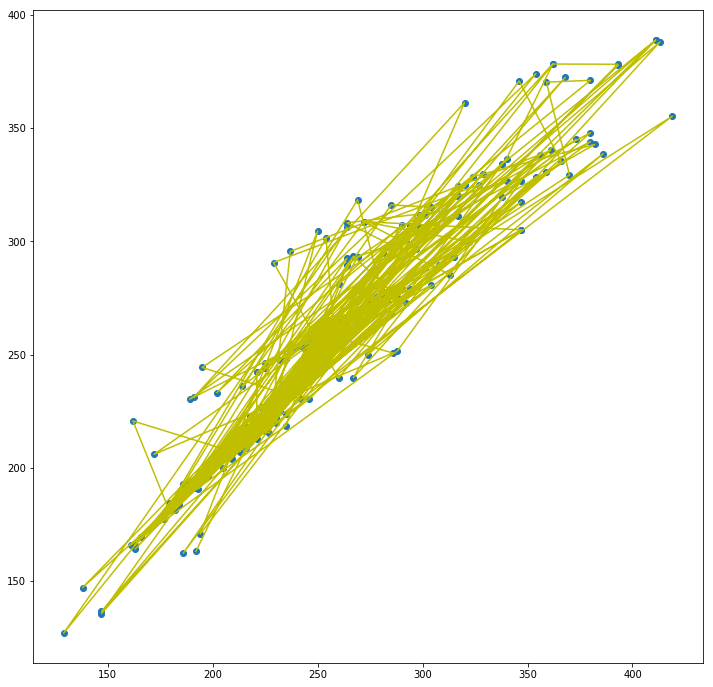

In [26]:
plt.scatter(Y_test,y_test_pred)
plt.plot(Y_test,y_test_pred,'y')
plt.gcf().set_size_inches(12,12)
plt.show()

In [27]:
print('MAE:', metrics.mean_absolute_error(Y_test, y_test_pred))
print('MSE:', metrics.mean_squared_error(Y_test, y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)))

MAE: 13.870323497748139
MSE: 386.9175754579135
RMSE: 19.670220523876022


In [28]:
print('MAE:', metrics.mean_absolute_error(Y_train, y_train_pred))
print('MSE:', metrics.mean_squared_error(Y_train, y_train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_train, y_train_pred)))

MAE: 13.968058987699578
MSE: 458.87327066940924
RMSE: 21.42132747215749
